In [123]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Kermack-McKendrick Equations for SIR Model
$$\frac{dS}{dt} = -\frac{\beta S I}{N}$$
$$\frac{dI}{dt} = \frac{\beta S I}{N} -\gamma I$$
$$\frac{dR}{dt} = \gamma I$$

Init: $S(0) + I(0) + R(0) = N = const$<br>
Source: https://mathworld.wolfram.com/Kermack-McKendrickModel.html

####Initial values

In [141]:
N = 10000
S_0 = 9999
I_0 = N - S_0
R_0 = 0

####Function

In [142]:
def SIR(y,t,N,beta,gamma):
  S,I,R = y
  SS = -beta*S*I/N
  II = beta*I*S/N-gamma*I
  RR = gamma*I
  return SS,II,RR

####Results & Plots

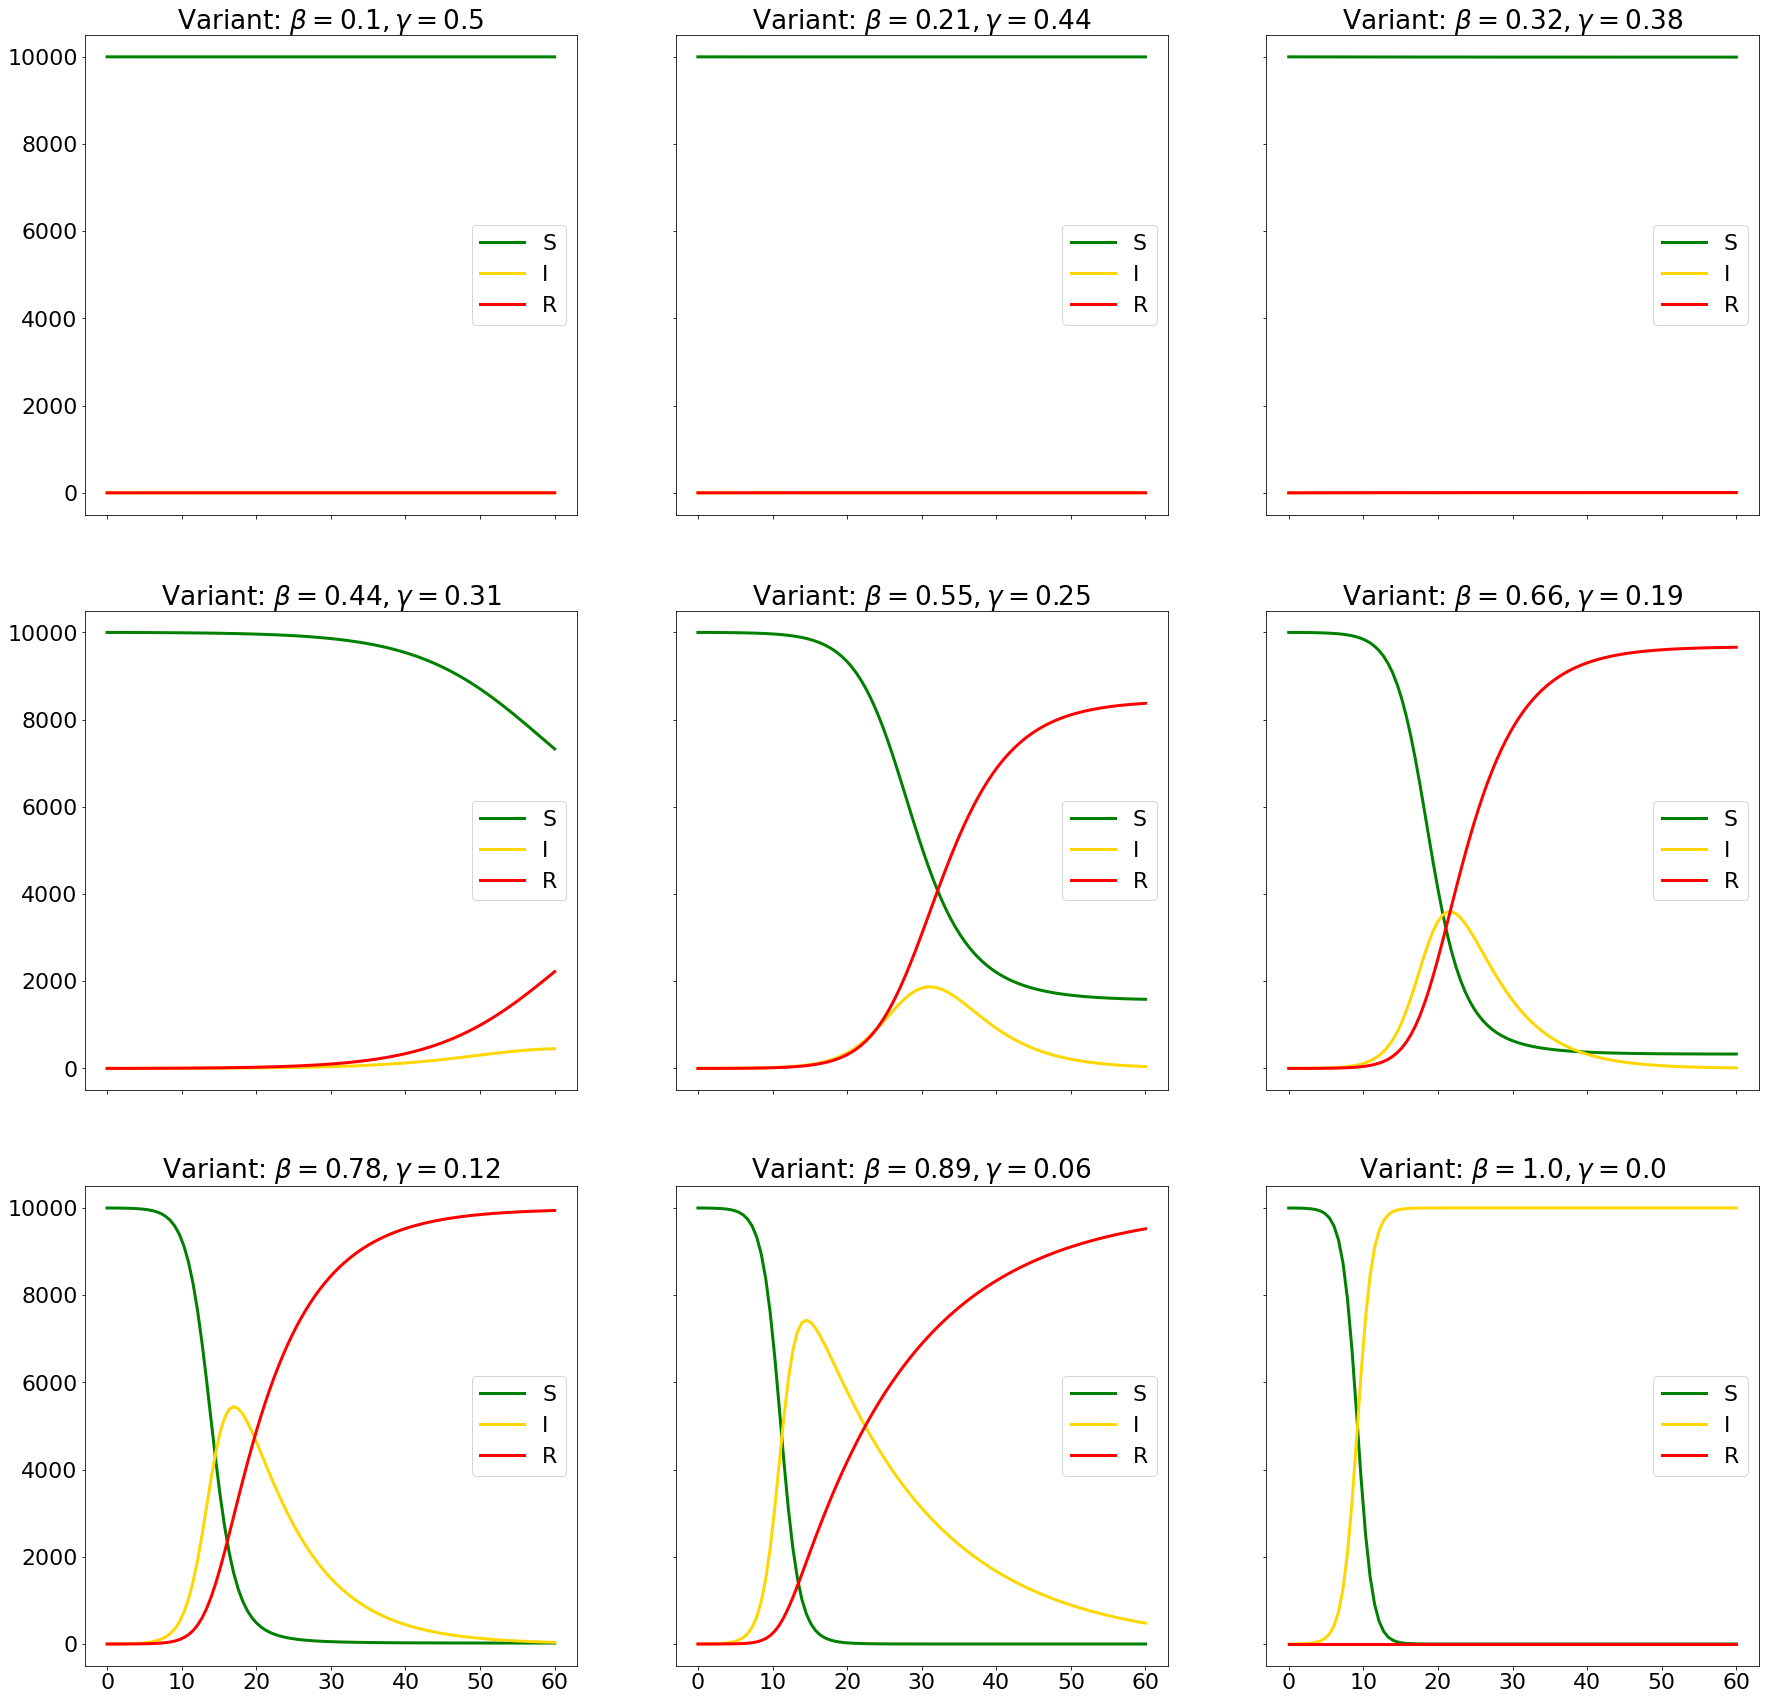

In [147]:
plt.rcParams.update({'font.size': 22})
fig, ((ax1, ax2,ax3),(ax4, ax5,ax6),(ax7, ax8,ax9)) = plt.subplots(3, 3, figsize = (30,30), sharex=True, sharey = True)
axes = ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9
bettas = np.linspace(0.1,1,9)
gammas = np.linspace(0,0.5,9)[::-1]
y_0 = S_0,I_0,R_0
t = np.linspace(0,60,100)

for i,(b,y) in enumerate(zip(bettas,gammas)):
  results = odeint(SIR, y_0, t, (N,b,y))
  axes[i].set_title(r"Variant: $\beta = {}, \gamma = {}$".format(round(b,2),round(y,2)))
  axes[i].plot(t,results[:,0], label = "S", color = "g", linewidth = 3)
  axes[i].plot(t,results[:,1], label = "I", color = "gold",linewidth = 3)
  axes[i].plot(t,results[:,2], label = "R", color = "r",linewidth = 3)
  axes[i].legend()